In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns', 500)

In [ ]:
# Load dataset
df = pd.read_csv('london_crime.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [ ]:
# Mengelompokkan rata-rata kasus kejahatan tiap tahun

kasus_per_tahun = df[['value', 'year']].groupby(['year'], as_index=False).mean()
kasus_per_tahun.head()

,year,value
0,2008.0,0.513290
1,2009.0,0.448872
2,2010.0,0.470519
3,2011.0,0.507493
4,2012.0,0.513318


In [ ]:
# Mengelompokkan nilai rata-rata kasus kejahatan berdasarkan wilayah pada kolom borough

kasus_per_wilayah = df[['value', 'borough']].groupby(['borough'], as_index=False).mean()
kasus_per_wilayah.head()

,borough,value
0,Barking and Dagenham,0.498645
1,Barnet,0.380325
2,Bexley,0.320144
3,Brent,0.418583
4,Bromley,0.348757


## Area Plot

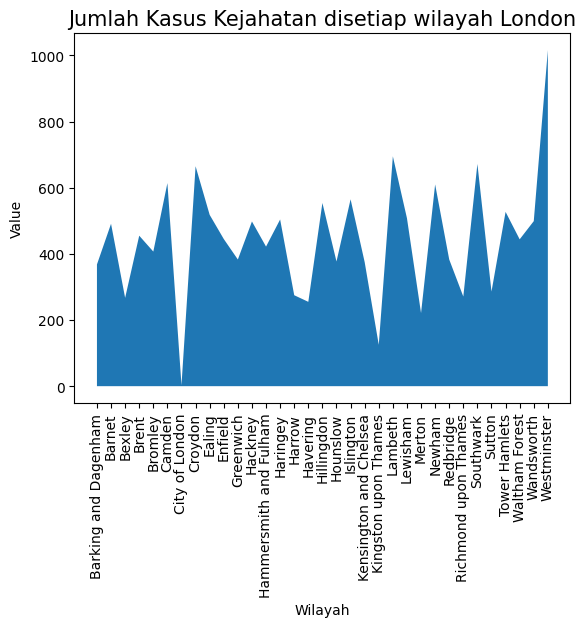

In [ ]:
# Mengelompokkan jumlah kasus di tiap wilayah
kasus = df['value'].groupby(df['borough']).sum()

# Menggunakan Matplotlib
plt.fill_between(kasus.index, kasus.values, alpha=1)
plt.xticks(rotation=90)
plt.xlabel('Wilayah')
plt.ylabel('Value')
plt.title('Jumlah Kasus Kejahatan disetiap wilayah London', size=15)

plt.show()

## Histogram

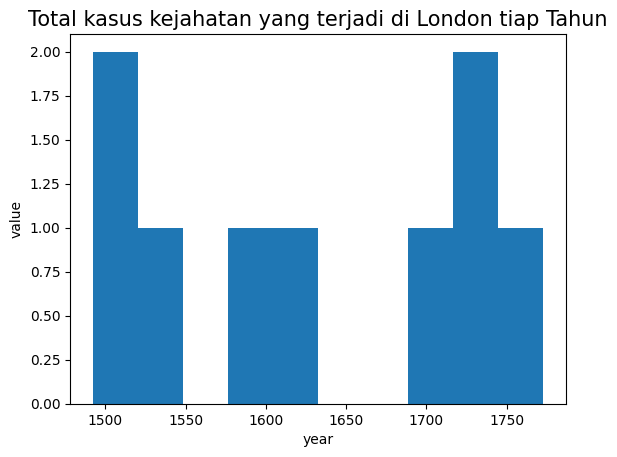

In [ ]:
# Jumlah atau total kasus per tahun

# Menggunakan Matplotlib
plt.hist(df['value'].groupby(df['year']).sum())
plt.title('Total kasus kejahatan yang terjadi di London tiap Tahun', size=15)
plt.xlabel('year')
plt.ylabel('value')
plt.show()

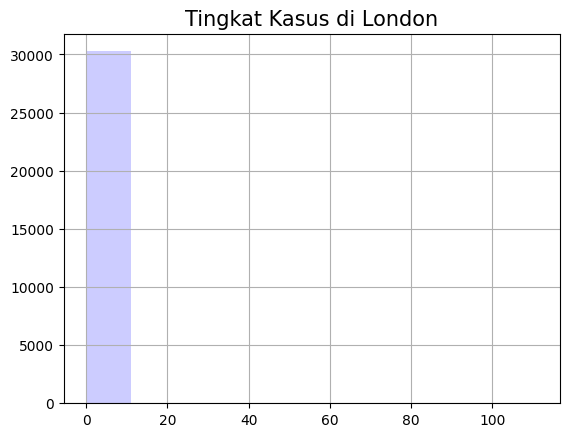

In [ ]:
# Menggunakan Pandas
df['value'].hist(color='blue', alpha=0.2)
plt.title('Tingkat Kasus di London', size=15)
plt.show()

## Bar Chart/ Bar Plot

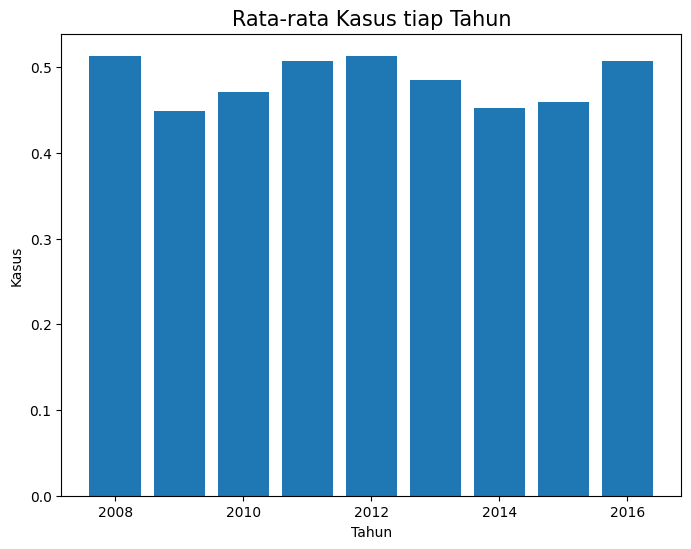

In [ ]:
# Rata-rata kasus kejahatan setiap tahun di London

# Menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.bar(kasus_per_tahun['year'], kasus_per_tahun['value'])
plt.title('Rata-rata Kasus tiap Tahun', size=15)
plt.xlabel('Tahun')
plt.ylabel('Kasus')
plt.show()

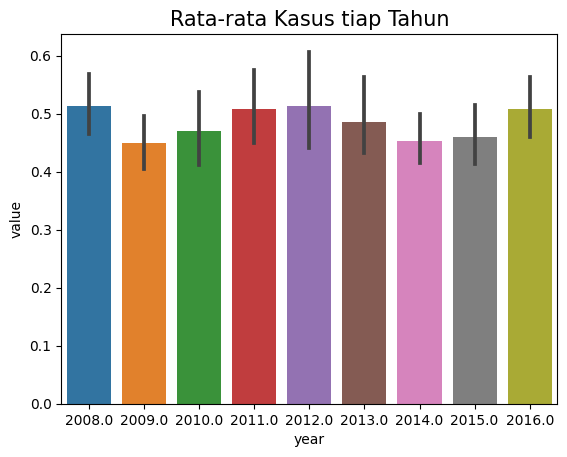

In [ ]:
# Rata-rata tingkat kejahatan/kasus yang terjadi di London tiap tahun

# Menggunakan Seaborn
sns.barplot(data=df, x='year', y='value')
plt.title('Rata-rata Kasus tiap Tahun', size=15)
plt.show()

## Pie Chart

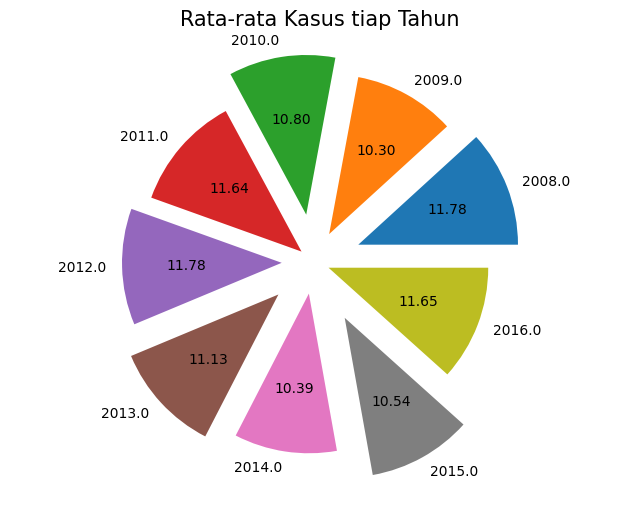

In [ ]:
# Menampilkan diagram lingkaran dari rata-rata kasus kejahatan di London tiap tahunnya

# Menggunakan Matplotlib
plt.figure(figsize=(8,6))
plt.pie(kasus_per_tahun['value'],
        labels = kasus_per_tahun['year'],
        autopct = '%.2f',
        explode = (0.3, 0.2, 0.3, 0.1, 0.2, 0.3, 0.2, 0.4, 0.1)
        )
plt.title('Rata-rata Kasus tiap Tahun', size=15)
plt.axis('equal')
plt.show()

## Box Plot

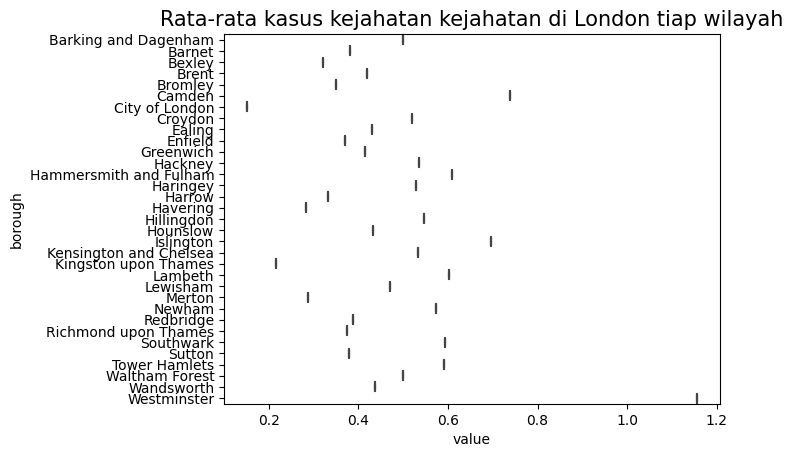

In [ ]:
# Menggunakan Seaborn
sns.boxplot(x = kasus_per_wilayah['value'], y = kasus_per_wilayah['borough'])
plt.title('Rata-rata kasus kejahatan kejahatan di London tiap wilayah', size=15)
plt.show()

## Scatter Plot

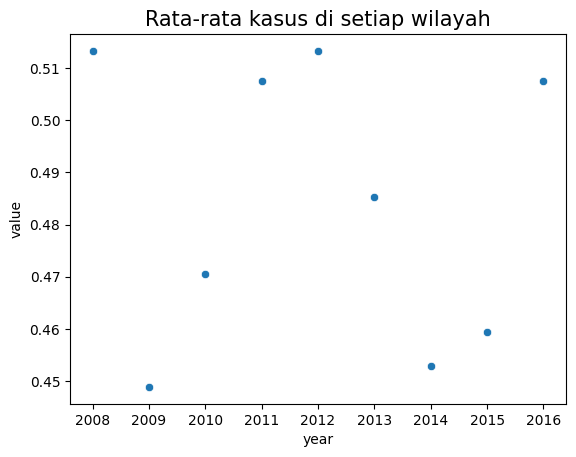

In [ ]:
# Menampilkan grafik dari rata-rata kasus kejahatan disetiap wilayah London tiap tahunnya.

# Menggunakan Seaborn
sns.scatterplot(data=kasus_per_tahun, x='year', y='value')
plt.title('Rata-rata kasus di setiap wilayah', size=15)
plt.show()

## Word Clouds

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud

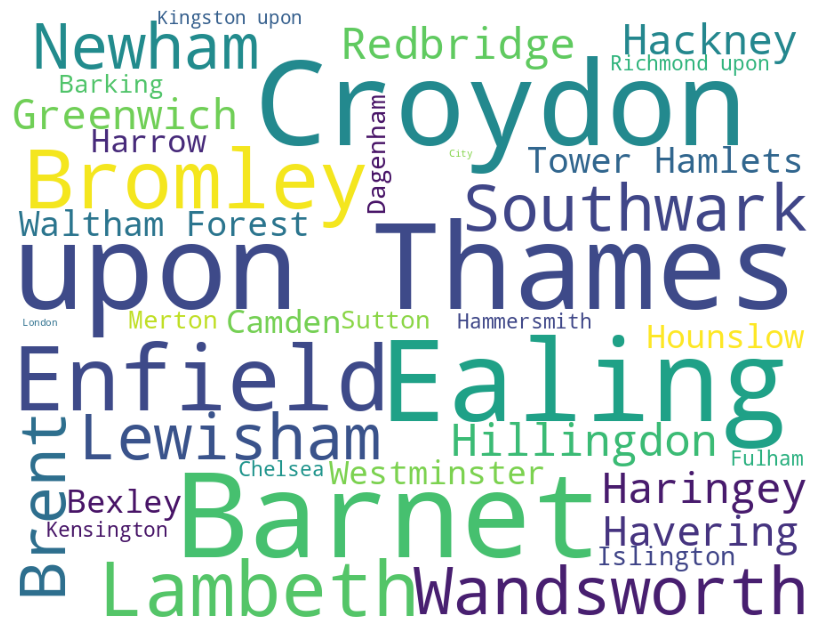

In [ ]:
# Melakukan list pada setiap kata yang ada pada kolom 'borough'
text = ' '.join((df['borough'].astype(str)).tolist())

# Mengatur panjang dan lebar gambar, latar belakang dan warna pada gambar
wordcloud = WordCloud(width=900, height=700, background_color='white').generate(text)

# Menampilakan gambar menggunakan metode Matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Folium Maps

In [ ]:
# Menggunakan titik akses lokasi untuk menampilkan map wilayah-wilayah di London
london_map = folium.Map(location=[51.5064097,-0.1114196], zoom_start=12)

london_map

In [ ]:
# Menambahkan marker di setiap wilayah London dan juga rata-rata kasus tiap wilayah
folium.Marker(location=[51.5541883,0.0583792], popup=kasus_per_wilayah.iloc[0, :]).add_to(london_map)
folium.Marker(location=[51.6578682,-0.3233598], popup=kasus_per_wilayah.iloc[1, :]).add_to(london_map)
folium.Marker(location=[51.436377,0.1281921], popup=kasus_per_wilayah.iloc[2, :]).add_to(london_map)
folium.Marker(location=[51.564098,-0.3335741], popup=kasus_per_wilayah.iloc[3, :]).add_to(london_map)
folium.Marker(location=[51.3949224,-0.0429843], popup=kasus_per_wilayah.iloc[4, :]).add_to(london_map)
folium.Marker(location=[51.5407277,-0.1588799], popup=kasus_per_wilayah.iloc[5, :]).add_to(london_map)
folium.Marker(location=[51.515069,-0.1107947], popup=kasus_per_wilayah.iloc[6, :]).add_to(london_map)
folium.Marker(location=[51.3679144,-0.1522797], popup=kasus_per_wilayah.iloc[7, :]).add_to(london_map)
folium.Marker(location=[51.4874505,-0.030475], popup=kasus_per_wilayah.iloc[8, :]).add_to(london_map)
folium.Marker(location=[51.4605171,-0.1848092], popup=kasus_per_wilayah.iloc[9, :]).add_to(london_map)
folium.Marker(location=[51.4927334,-0.2383001], popup=kasus_per_wilayah.iloc[10, :]).add_to(london_map)
folium.Marker(location=[51.4760313,-0.2189919], popup=kasus_per_wilayah.iloc[11, :]).add_to(london_map)
folium.Marker(location=[51.4877006,-0.1866127], popup=kasus_per_wilayah.iloc[12, :]).add_to(london_map)
folium.Marker(location=[51.4954627,-0.2100892], popup=kasus_per_wilayah.iloc[13, :]).add_to(london_map)
folium.Marker(location=[51.4977836,-0.1522502], popup=kasus_per_wilayah.iloc[14, :]).add_to(london_map)
folium.Marker(location=[51.4576142,-0.2016284], popup=kasus_per_wilayah.iloc[15, :]).add_to(london_map)


london_map